* being provoked by goodfellow's chapter on probability theory to try out pytorch

## utils

* making some utils for drawing probability distributions

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from torch import distributions as dist
from torch import tensor, ones, zeros, arange, linspace
import torch
from functools import partial

from torch.distributions.constraints import \
        Constraint, \
        _Real, _Interval, _IntegerInterval, \
        _GreaterThan, _GreaterThanEq


In [2]:
def get_support_values(constraint: Constraint, steps: int = 100) -> torch.Tensor:
    linspace = partial(torch.linspace, steps=steps)
    
    match constraint:
        case _Real():
            return torch.linspace(-10, 10, steps)
        case _Interval():
            return torch.linspace(constraint.lower_bound, constraint.upper_bound, 100)
        case _IntegerInterval():
            return torch.arange(constraint.lower_bound, constraint.upper_bound + 1)
        case _GreaterThan():
            return torch.linspace(constraint.lower_bound, constraint.upper_bound, 100)
        case _:
            return None
    

## probability distributions

* random variables are just variables that may take on different values, and of which one does not know the actual value in advance
* instead, they are defined by association with a probability distribution:
    * the probability attributed to each possible value - in discrete cases (dubbed PMF); or
    * the probability attributed to each possible range of values - in continuous cases (dubbed PDF)
* the probability distribution is thus a function - some mapping - which we'll name $p$ -with few restrictions that come as a simple consequence of the axioms of probability theory (in either presentation)
    

* probability theory gives a set of axioms for dealing with probability on any given statements $A, B, H$, and any given partition statements $E_1, E_2, ..., E_n$ (i.e., a mutually exclusive and comprehensive set of statements):
    * absorbent value's convention: $0 \leq P(A)$
    * normalized values' convention: $P(A) \leq 1$
    * product rule: $P(A, B) = P(A|B)P(B)$, or $P(A, B|H) = P(A|B,H)P(B,H)$
    * sum rule: $P(A \text{ or } B) = P(A) + P(B) - P(A,B)$
    * partition: $P(A) = \sum P(A, E_i)$

* for our unidimensional r.v. case, we get:
    * $\forall x, p(x) \geq 0$
    * $\sum_i p(x_i) = 1$, or $\int_x p(x) = 1$

* naturally, if one r.v. is cast as a function of another, aka $Y = f(X)$ for some $f$,
    * then the probability distribution of $Y$ is also a function of the probability for $X$
    * given that it satisfies some general properties that most of our well behaved famous functions will do

* more so, for the distributions of r.v. associated with constructive assumptions (such as: the r.v. corresponding to the number of sucesses in a sequence of independent trials),
    * one

### discrete variables

so, discrete r.v.'s may always be specified by a finite table of the form $x_i \rightarrow p(x_i)$

#### **Categorical**

* the **general case** in which one wants to specify the actual probability of each value goes by the names of:
    * Categorical
    * Multinoulli

* one such distribution is fully described by describing the probability of each possible value - its sufficient statistics; its parameters - sometimes dubbed $\theta_1, ..., \theta_n$, for $X \in {1, ..., n}$

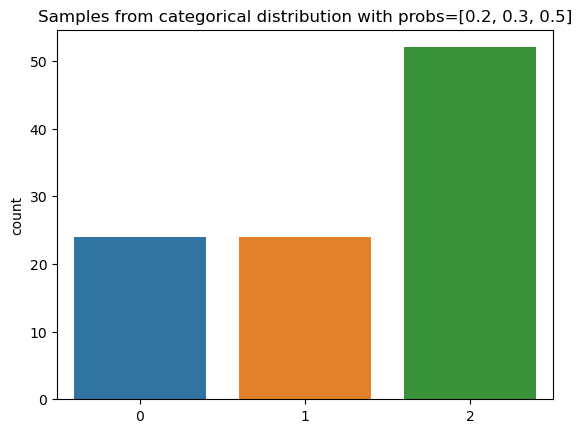

In [31]:
X_cat = dist.Categorical(probs=tensor([0.2, 0.3, 0.5]))
ax = sns.countplot(x=X_cat.sample((100,)).numpy());
ax.set_title("Samples from categorical distribution with probs=[0.2, 0.3, 0.5]");

* well, some of the categorical distributions are special enough that they deserve their own name
* in which sense - _special_?
    * they have a generating procedure from which they are fully specified
    * which simplifies the amount of information/parameters needed to specify the distribution
    * one instead knows the probability as an expression of the value and the distribution's sufficient statistics

#### special cases of discrete

##### **Bernoulli**

* ***when we care about a binary variable***

* basically any r.v. with only 2 possible values $\{x_1, x_2\}$ may be cast as a Bernoulli distribution
* when one equates $x_1 \rightarrow 0$ and $x_2 \rightarrow 1$
* we may only care about the probability of $x_2$, aka $P(X=1)$, aka $p$, aka $\theta$, etc
    * since $P(X=0) = 1 - P(X=1) = 1 - p$
* and name $x_2$ as our _success_, accordingly (!)

* if one so wishes, she can write:
    * $X \sim Bernoulli(\theta)$
    * $p(X) = \theta^X (1 - \theta)^{1 - X}$, in order to get a fully specified expression

##### **Binomial**

* ***when one cares about counting the number of successes in $n$ independent and binary trials***

##### **HyperGeometric**

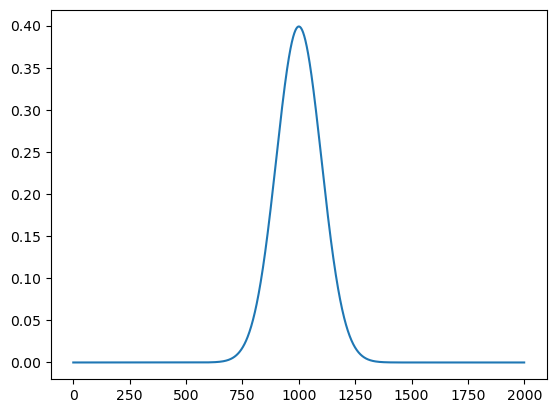

In [40]:
import matplotlib.pyplot as plt
support = arange(-10, 10, .01)

plt.plot(X.log_prob().exp());

In [8]:
X.sample((3, 4))

tensor([[ 0.6834, -0.1529,  0.3176, -0.0976],
        [-0.6953, -1.2232,  0.7205, -0.1257],
        [ 0.8779,  0.5753,  1.4915, -1.3134]])

In [3]:
X = dist.gamma.Gamma(1, 1)

In [6]:
X.support, X.mean, X.variance

(GreaterThanEq(lower_bound=0.0), tensor(1.), tensor(1.))